In [50]:
import numpy as np
import matplotlib.pyplot as plt
import nest as sim

sim.ResetKernel()

mins = 10.
sim_len = int(mins * 60000)
print(f'simulation length: {mins} mins = {sim_len} ms')

N = 63 # number of cells

simulation length: 10.0 mins = 600000 ms


### Create population

In [51]:
population = sim.Create("iaf_psc_alpha",N)

### Load spike times from file

In [52]:
spktms = np.load('exampleSpikeTimes.npy',allow_pickle = True)

### Arrange spike times into array of parameter dictionaries

- One dictionary per cell
- Dictionary contains list of spike times

In [53]:
params = []
for cell in np.arange(len((spktms))):
    params.append({'spike_times':spktms[cell]})

### Create one spike generator device per cell, pass array of spike time dictionaries

Connect each spike generator to each cell one to one

In [53]:
spike_input = sim.Create('spike_generator', N, params)
sim.Connect(spike_input,population,'one_to_one',syn_spec={'weight': 2000, 'delay': 0.1})

This is very similar in pyNN i think, the device is called a SpikeSourceArray

http://neuralensemble.org/docs/PyNN/reference/neuronmodels.html#pyNN.standardmodels.cells.SpikeSourceArray

### Record spike activity

In [54]:
spike_recorder = sim.Create("spike_detector", N, params={"withgid": True,"withtime": True})
sim.Connect(population,spike_recorder)

### Run simulation

In [55]:
sim.Simulate(sim_len)

### Get spike data

In [56]:
ev = sim.GetStatus(spike_recorder)[0]['events']
t = ev['times']
sp = ev['senders']

Text(0.5, 0, 'Time (ms)')

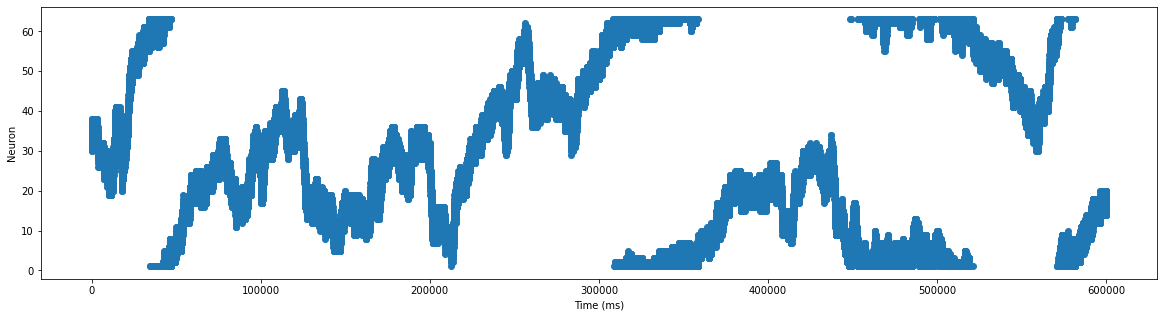

In [57]:
plt.figure(figsize = (20,5))
plt.scatter(t,sp)
plt.ylabel('Neuron')
plt.xlabel('Time (ms)')

The spike data provided was from my HD cell model, the spikes show a bump of active cells which travels across the network over time as an estimate of current heading